# Анализ бизнес-показателей мобильного приложения Procrastinate Pro+

Целями проекта являются:
- выявить откуда приходят пользователи и какие устройства для входа они используют;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.

# Данные для работы

<b>СТРУКТУРА VISITS_INFO_SHORT.CSV:<b>
    
- User Id — уникальный идентификатор пользователя,
    
- Region — страна пользователя,
    
- Device — тип устройства пользователя,
    
- Channel — идентификатор источника перехода,
    
- Session Start — дата и время начала сессии,

- Session End — дата и время окончания сессии.

<b>СТРУКТУРА ORDERS_INFO_SHORT.CSV:<b>
    
- User Id — уникальный идентификатор пользователя,

- Event Dt — дата и время покупки,

- Revenue — сумма заказа.

<b>СТРУКТУРА COSTS_INFO_SHORT.CSV:<b>
    
    
- Channel — идентификатор рекламного источника,

- costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )


except:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )

In [3]:
def data_check(dataframe):
    print("\nОбщая информация о датафрейме:\n")
    dataframe.info()
    print("\nПропуски в каждом столбце:\n", dataframe.isnull().sum())
    print("\nКоличество дубликатов:", dataframe.duplicated().sum())   

In [4]:
data_check(visits)


Общая информация о датафрейме:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Пропуски в каждом столбце:
 User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Количество дубликатов: 0


In [5]:
data_check(orders)


Общая информация о датафрейме:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Пропуски в каждом столбце:
 User Id     0
Event Dt    0
Revenue     0
dtype: int64

Количество дубликатов: 0


In [6]:
data_check(costs)


Общая информация о датафрейме:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Пропуски в каждом столбце:
 dt         0
Channel    0
costs      0
dtype: int64

Количество дубликатов: 0


In [7]:
visits.rename(columns=str.lower, inplace=True)
orders.rename(columns=str.lower, inplace=True)
costs.rename(columns=str.lower, inplace=True)

In [8]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [10]:
visits.head(5)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [11]:
orders.head(5)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
costs.head(5)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

<b>Создание профилей пользователей<b>

In [13]:
def get_profiles(sessions, orders, costs):
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg(
        {
            'session_start' : 'first',
            'channel' : 'first',
            'device' : 'first',
            'region' : 'first'
        }
    )
                .rename(columns={'session_start' : 'first_ts'})
                .reset_index()
                )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.date

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

<b>Функция для расчета удержания<b>

In [14]:
def get_retention(
        profiles,
        sessions,
        observation_date,
        horizon_days,
        dimensions=[],
        ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw  = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
            result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return result_raw, result_grouped, result_in_time

<b> Функция для расчета конверсии<b>

In [15]:
def get_conversion(
        profiles,
        purchases,
        observation_date,
        horizon_days,
        dimensions=[],
        ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
            result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<b>Функция для расчета LTV и ROI<b>

In [16]:
def get_ltv(
        profiles,
        purchases,
        observation_date,
        horizon_days,
        dimensions=[],
        ignore_horizon=False,
):
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
            result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<b>Функция для сглаживания фрейма<b>

In [17]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

<b>Функция для визуализации удержания<b>

In [18]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))
    retention = retention.drop(columns=['cohort_size', 0])

    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

  
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

   
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')


    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

   
    ax3 = plt.subplot(2, 2, 3)

    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]

    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )


    ax4 = plt.subplot(2, 2, 4, sharey=ax3)

    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

<b>Функция для визуализации конверсии<b>

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])

    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
       
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<b>Функция для визуализации LTV и ROI<b>

In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]


    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<mark style="background-color: green;"><b>Функции взяты из теории.<b></mark>

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [21]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [22]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02,False,0.230769


In [23]:
min_date = profiles.first_ts.min()
max_date = profiles.first_ts.max()
print('Минимальная дата привлечения пользователей:', min_date, '\nМаксимальная дата привлечения пользователей:', max_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41 
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


Из полученных данных видно, что минимальной датой привлечения является 1 мая 2019 года, а максимальной - 27 октября 2019 года. Дата на момент анализа 01.11.2019, горизонт анализа 14 дней. Результаты соответствуют описанию.

In [24]:
countries = profiles.groupby('region')['user_id'].nunique().reset_index()
cp = profiles.query('payer == True').groupby('region')['user_id'].nunique().reset_index()
countries = countries.merge(cp, on='region', how='left')
countries.columns = ['region', 'total_users', 'payers']
countries['payers_persent'] = round(countries.payers/ countries.total_users, 4)
countries

,region,total_users,payers,payers_persent
0,France,17450,663,0.0380
1,Germany,14981,616,0.0411
2,UK,17575,700,0.0398
3,United States,100002,6902,0.0690


In [25]:
devices = profiles.groupby('device')['user_id'].nunique().reset_index()
dp = profiles.query('payer == True').groupby('device')['user_id'].nunique().reset_index()
devices = devices.merge(dp, on='device', how='left')
devices.columns = ['device', 'total_users', 'payers']
devices['payers_persent'] = round(devices.payers/ devices.total_users, 4)
devices

,device,total_users,payers,payers_persent
0,Android,35032,2050,0.0585
1,Mac,30042,1912,0.0636
2,PC,30455,1537,0.0505
3,iPhone,54479,3382,0.0621


In [26]:
channels = profiles.groupby('channel')['user_id'].nunique().reset_index()
chp = profiles.query('payer == True').groupby('channel')['user_id'].nunique().reset_index()
channels = channels.merge(chp, on='channel', how='left')
channels.columns = ['channel', 'total_users', 'payers']
channels['payers_persent'] = round(channels.payers/ channels.total_users, 4)
channels

,channel,total_users,payers,payers_persent
0,AdNonSense,3880,440,0.1134
1,FaceBoom,29144,3557,0.1220
2,LeapBob,8553,262,0.0306
3,MediaTornado,4364,156,0.0357
4,OppleCreativeMedia,8605,233,0.0271
5,RocketSuperAds,4448,352,0.0791
6,TipTop,19561,1878,0.0960
7,WahooNetBanner,8553,453,0.0530
8,YRabbit,4312,165,0.0383
9,lambdaMediaAds,2149,225,0.1047


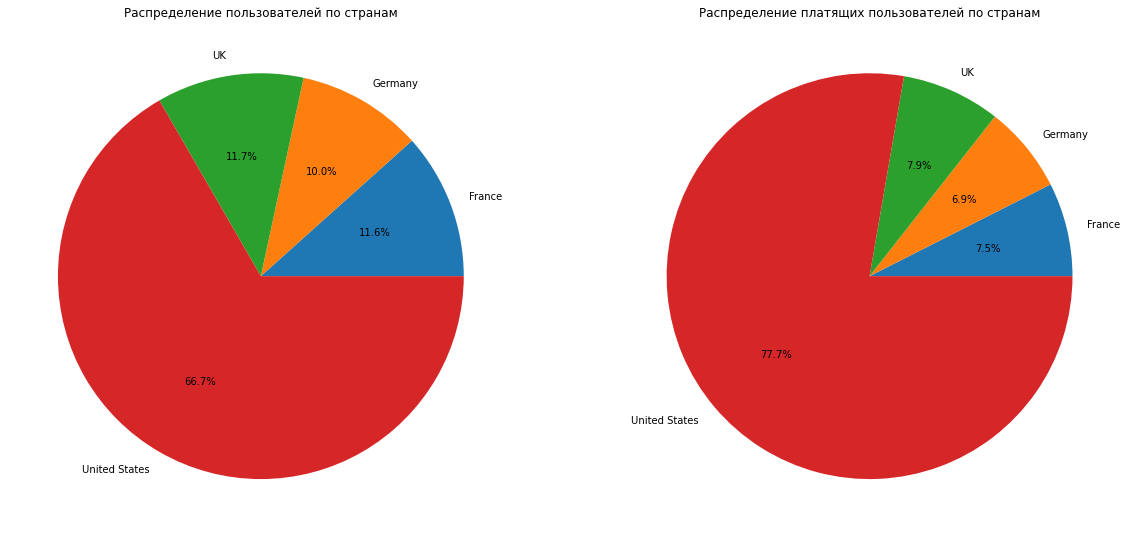

In [27]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.pie(countries['total_users'], labels=countries['region'], autopct='%1.1f%%')
plt.title('Распределение пользователей по странам')

plt.subplot(1, 2, 2)
plt.pie(countries['payers'], labels=countries['region'], autopct='%1.1f%%')
plt.title('Распределение платящих пользователей по странам');

Пользователи распределены по 4 регионам, таким как Франция, Германия, Великобритания и США. Наибольшее количество пользователей приходится на США - 66.7%, там оно составляет 100002 человек. Наименьшее количество пользователей из Германии - 10% и их количество всего 14981. Однако, больше всего платящих пользователей пришли из Франции, а меньше всего из США. Таким образом, можно сказать, что французы наиболее ценная аудитория для компании. 

In [28]:
devices = profiles.groupby('device')['user_id'].nunique().reset_index()
cp = profiles.query('payer == True').groupby('device')['user_id'].nunique().reset_index()
devices = devices.merge(cp, on='device', how='left')
devices.columns = ['device', 'total_users', 'payers']
devices['payers_persent'] = round(devices.total_users / devices.payers, 2)
devices

,device,total_users,payers,payers_persent
0,Android,35032,2050,17.09
1,Mac,30042,1912,15.71
2,PC,30455,1537,19.81
3,iPhone,54479,3382,16.11


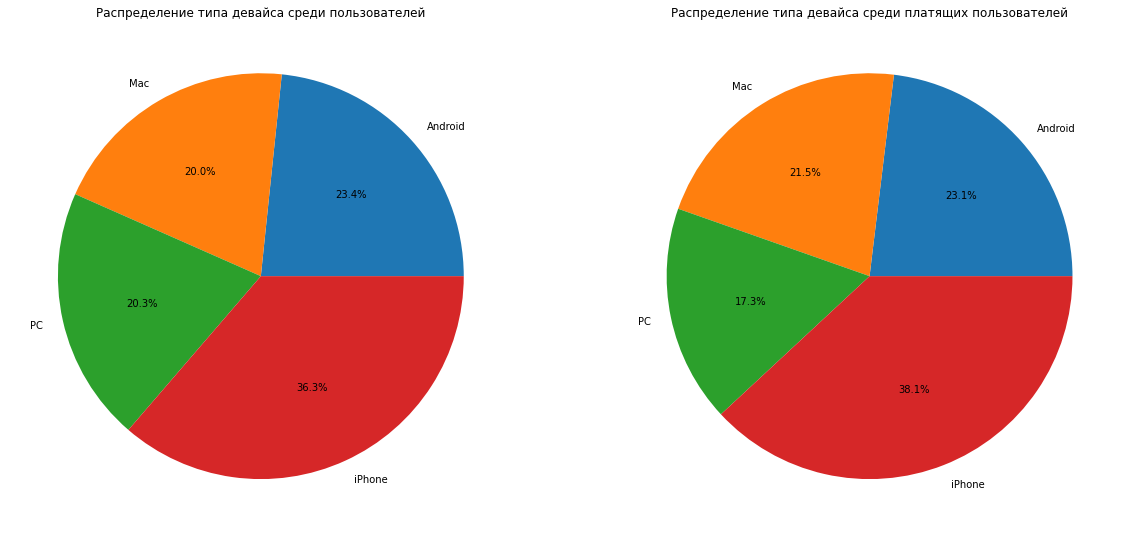

In [29]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.pie(devices['total_users'], labels=devices['device'], autopct='%1.1f%%')
plt.title('Распределение типа девайса среди пользователей')

plt.subplot(1, 2, 2)
plt.pie(devices['payers'], labels=devices['device'], autopct='%1.1f%%')
plt.title('Распределение типа девайса среди платящих пользователей');

Пользователи используют Андроид, Айфон, Мак и компьютер для входа в приложение. Большинство установок приходится на айфон - 36.3%, меньше всего на Макбук - 20%. Однако, наибольшее количество платящих пользователей используют компьютер, а наименьше всего - Макбук.


In [30]:
channels = profiles.groupby('channel')['user_id'].nunique().reset_index()
cp = profiles.query('payer == True').groupby('channel')['user_id'].nunique().reset_index()
channels = channels.merge(cp, on='channel', how='left')
channels.columns = ['channel', 'total_users', 'payers']
channels['payers_persent'] = round(channels.total_users / channels.payers, 2)
channels = channels.sort_values(by='total_users', ascending=False)
channels

,channel,total_users,payers,payers_persent
10,organic,56439,1160,48.65
1,FaceBoom,29144,3557,8.19
6,TipTop,19561,1878,10.42
4,OppleCreativeMedia,8605,233,36.93
2,LeapBob,8553,262,32.65
7,WahooNetBanner,8553,453,18.88
5,RocketSuperAds,4448,352,12.64
3,MediaTornado,4364,156,27.97
8,YRabbit,4312,165,26.13
0,AdNonSense,3880,440,8.82


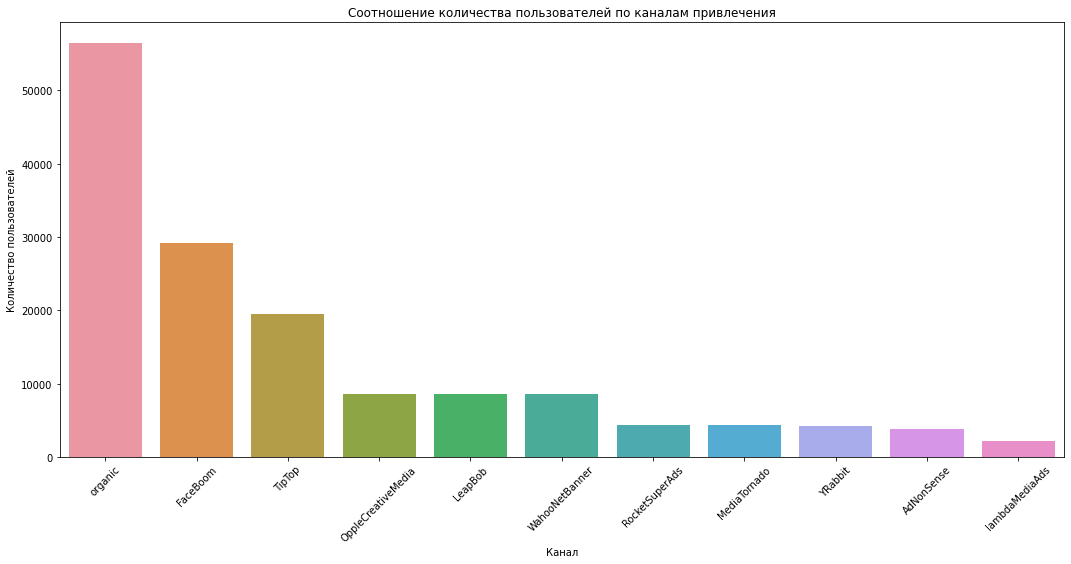

In [31]:
plt.figure(figsize=(18, 8))
sns.barplot(x=channels['channel'], y=channels['total_users'])
plt.xlabel('Канал')
plt.ylabel('Количество пользователей')
plt.title('Соотношение количества пользователей по каналам привлечения')
plt.xticks(rotation=45);

Среди каналов привлечения оказались такие как органический, AdNonSense, FaceBoom, LeapBob, MediaTornado, OppleCreativeMedia, RocketSuperAds, TipTop, WahooNetBanner, Rabbit, lambdaMediaAds. Больше всего пользователей пришло из органического канала, то есть они самостоятельно нашли приложение. Также, доля плательщиков среди данных пользователей составляет 48.65%. Меньше всего пользователей было привлечено из канала lambdaMediaAds, а наименьшее количество плательщиков пришло из канала FaceBoom.

Таким образом, можно сделать выводы, что для бизнеса наиболее ценны пользователи, пришедшие самостоятельно, пользующиеся компьютером для входа в приложение, а также пользователи из Франции, так как на них приходится больший процент платящих пользователей.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [32]:
payed_profiles = profiles.query('channel != "organic"')
total_costs = profiles.acquisition_cost.sum()
print('Общая сумма затратов на маркетинг составила:', round(total_costs, 2))

Общая сумма затратов на маркетинг составила: 105497.3


In [33]:
channels_costs = payed_profiles.groupby('channel').agg({'acquisition_cost': 'sum'})
channels_costs = channels_costs.sort_values('acquisition_cost', ascending=False)
channels_costs['cost_percent'] = round(channels_costs['acquisition_cost'] * 100 / total_costs, 2)
channels_costs

,acquisition_cost,cost_percent
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


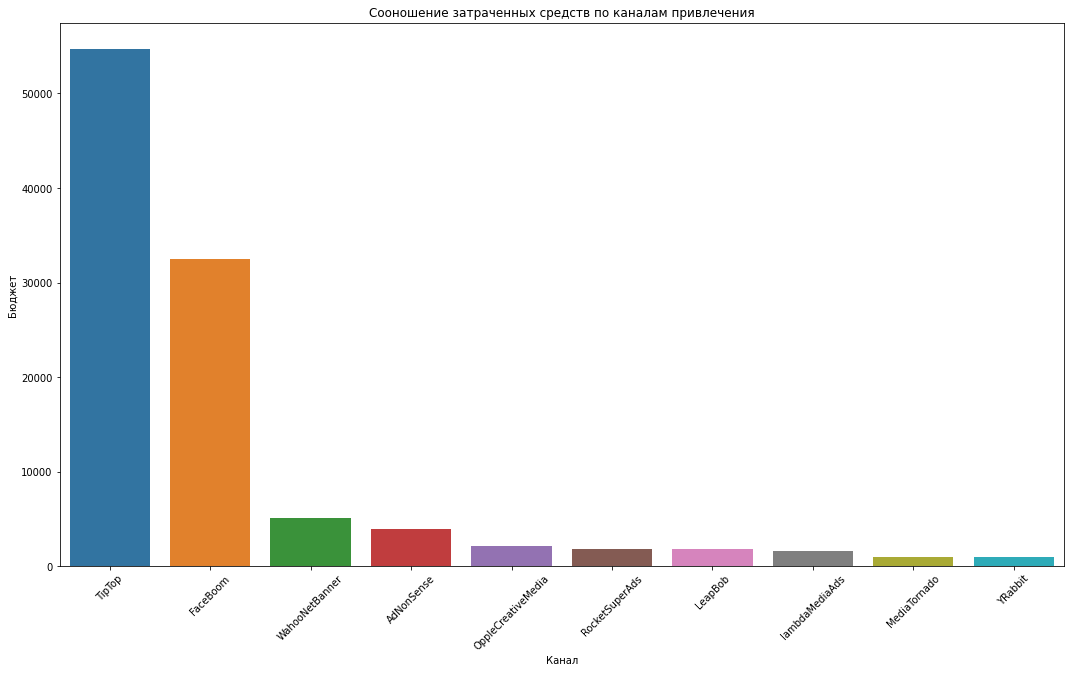

In [34]:
plt.figure(figsize=(18, 10))
sns.barplot(x=channels_costs.index, y=channels_costs.acquisition_cost)
plt.xlabel('Канал')
plt.ylabel('Бюджет')
plt.title('Сооношение затраченных средств по каналам привлечения')
plt.xticks(rotation=45);

Самым дорогим источником привлечения пользователей оказался TipTop. На рекламу в данном канале было затрачено 54751.30 р. Самым дешевым, не считая органический, оказался YRabbit, на рекламу в котором использовали всего 944.22 р.


In [35]:
costs_info = costs.groupby('channel')['costs'].sum().reset_index()
cac_info = channels.merge(costs_info, on='channel', how='left')
cac_info = cac_info.query('channel != "organic"')
cac_info

,channel,total_users,payers,payers_persent,costs
1,FaceBoom,29144,3557,8.19,32445.60
2,TipTop,19561,1878,10.42,54751.30
3,OppleCreativeMedia,8605,233,36.93,2151.25
4,LeapBob,8553,262,32.65,1797.60
5,WahooNetBanner,8553,453,18.88,5151.00
6,RocketSuperAds,4448,352,12.64,1833.00
7,MediaTornado,4364,156,27.97,954.48
8,YRabbit,4312,165,26.13,944.22
9,AdNonSense,3880,440,8.82,3911.25
10,lambdaMediaAds,2149,225,9.55,1557.60


In [36]:
cac_info['avg_cac'] = round(cac_info.costs / cac_info.total_users, 2)
cac_info.sort_values(by='avg_cac', ascending=False)

,channel,total_users,payers,payers_persent,costs,avg_cac
2,TipTop,19561,1878,10.42,54751.30,2.80
1,FaceBoom,29144,3557,8.19,32445.60,1.11
9,AdNonSense,3880,440,8.82,3911.25,1.01
10,lambdaMediaAds,2149,225,9.55,1557.60,0.72
5,WahooNetBanner,8553,453,18.88,5151.00,0.60
6,RocketSuperAds,4448,352,12.64,1833.00,0.41
3,OppleCreativeMedia,8605,233,36.93,2151.25,0.25
7,MediaTornado,4364,156,27.97,954.48,0.22
8,YRabbit,4312,165,26.13,944.22,0.22
4,LeapBob,8553,262,32.65,1797.60,0.21


<p>Общая сумма затрат на рекламу составила <span>&#36;105497.3</span>. 
При этом, больше половины бюджета было выделено на такой источник как TipTop, средняя стоимость пользователя из которого составила <span>&#36;2.8</span>. 
Самым дешевым из платных источников оказался YRabbit со средней стоимостью пользователя в <span>&#36;0.22</span>, и общей суммой затрат на рекламу — <span>&#36;944.22</span>, и канал LeapBob, где один пользователь стоил <span>&#36;0.21</span>.</p>

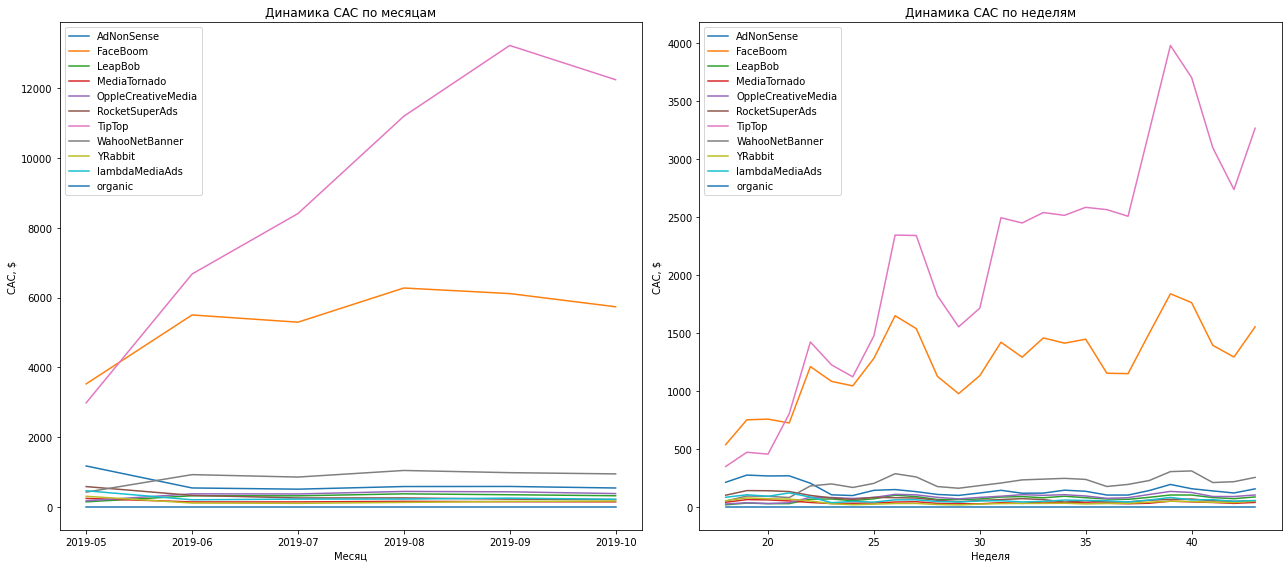

In [37]:
profiles['session_month'] = profiles['first_ts'].dt.to_period('M')
profiles['session_week'] = profiles['first_ts'].dt.isocalendar().week

monthly_data = (
    profiles.groupby(['channel', 'session_month'])
    .agg({'acquisition_cost': 'sum'})
    .reset_index()
)

weekly_data = (
    profiles.groupby(['channel', 'session_week'])
    .agg({'acquisition_cost': 'sum'})
    .reset_index()
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Первый график - динамика CAC по месяцам
for channel in monthly_data['channel'].unique():
    channel_data = monthly_data[monthly_data['channel'] == channel]
    ax1.plot(channel_data['session_month'].astype(str), channel_data['acquisition_cost'], label=channel)

ax1.set_xlabel('Месяц')
ax1.set_ylabel('CAC, $')
ax1.set_title('Динамика CAC по месяцам')
ax1.legend()

# Второй график - динамика CAC по неделям
for channel in weekly_data['channel'].unique():
    channel_data = weekly_data[weekly_data['channel'] == channel]
    ax2.plot(channel_data['session_week'], channel_data['acquisition_cost'], label=channel)

ax2.set_xlabel('Неделя')
ax2.set_ylabel('CAC, $')
ax2.set_title('Динамика CAC по неделям')
ax2.legend()

plt.tight_layout()
plt.show()

In [38]:
avg_cac_channel = profiles.groupby('channel')['acquisition_cost'].mean().reset_index()
avg_cac_channel.columns = ['channel', 'average_cac']
avg_cac_channel = avg_cac_channel.sort_values(by='average_cac', ascending=False)
avg_cac_channel

,channel,average_cac
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


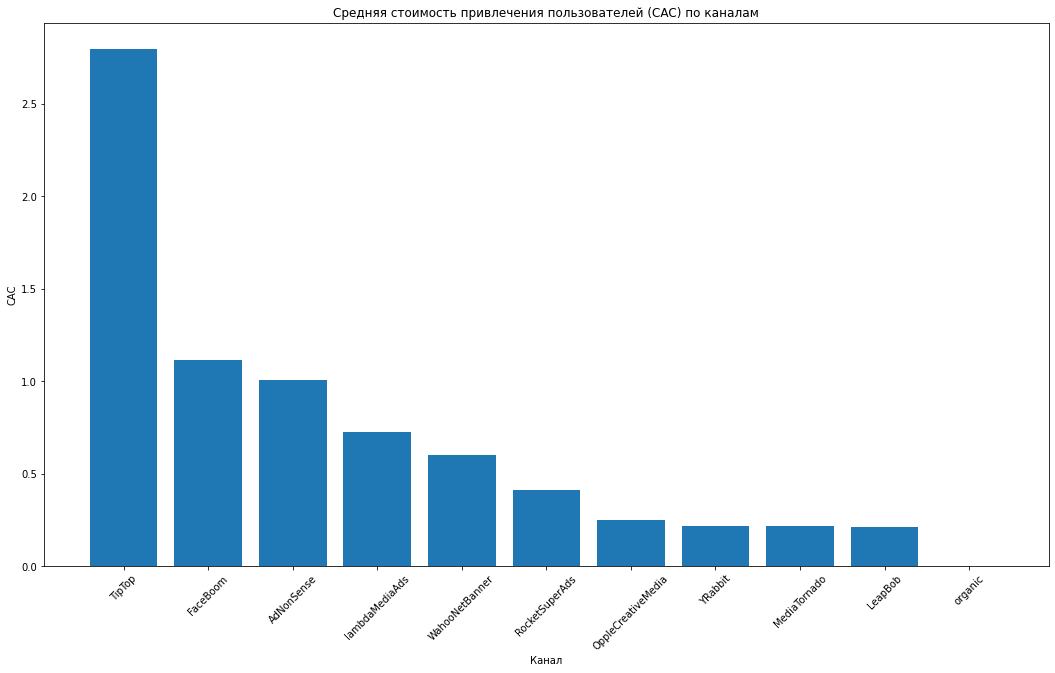

In [39]:
plt.figure(figsize=(18, 10))
plt.bar(avg_cac_channel['channel'], avg_cac_channel['average_cac'])
plt.title('Средняя стоимость привлечения пользователей (CAC) по каналам')
plt.xlabel('Канал')
plt.ylabel('CAC')
plt.xticks(rotation=45);

На графиках заметно, что с каждой неделей (и с каждым месяцем) затраты на рекламу в TipTop и FaceBoom лишь увеличиваются, в то время как затраты на рекламу в других каналах остаются неизменными, можно заметить легкие скачки стоимости рекламы в RocketSuperAds, что может быть связано с запусками каких-либо новых проектов на том канале или другими мероприятиями. Если же взглянуть на месячный график, то там затраты также стабильны. В общей сумме на рекламу приложения в различных каналах было затрачено 105497.3$. Самым дорогим каналом оказался TipTop, а самым дешевым YRabbit. 


### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

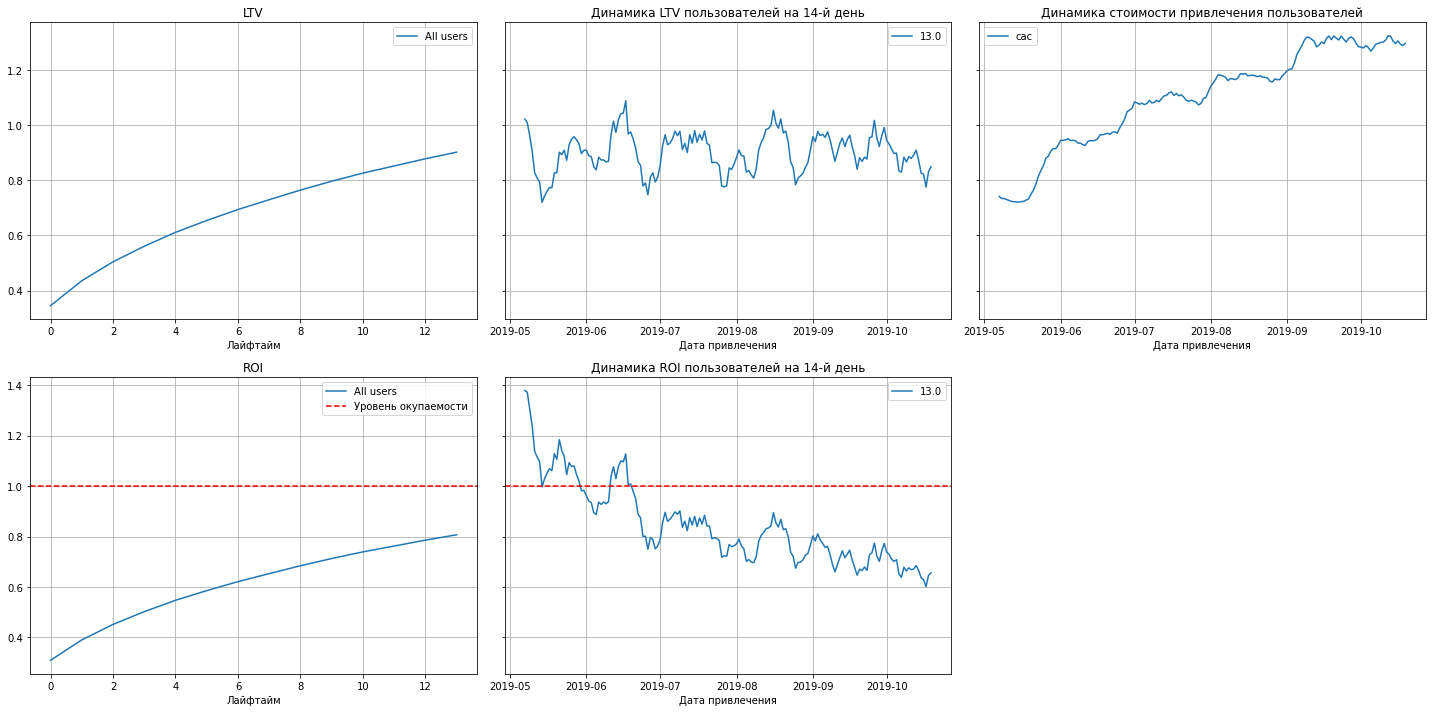

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(payed_profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

LTV остается стабильным, это может говорить о том, что пользователи систематически совершают оплату приложения. САС постепенно растет, а это означает, что рекламные кампании запускаются регулярно. Однако, несмотря на это ROI к 14 дню становится ниже уровня окупаемости.

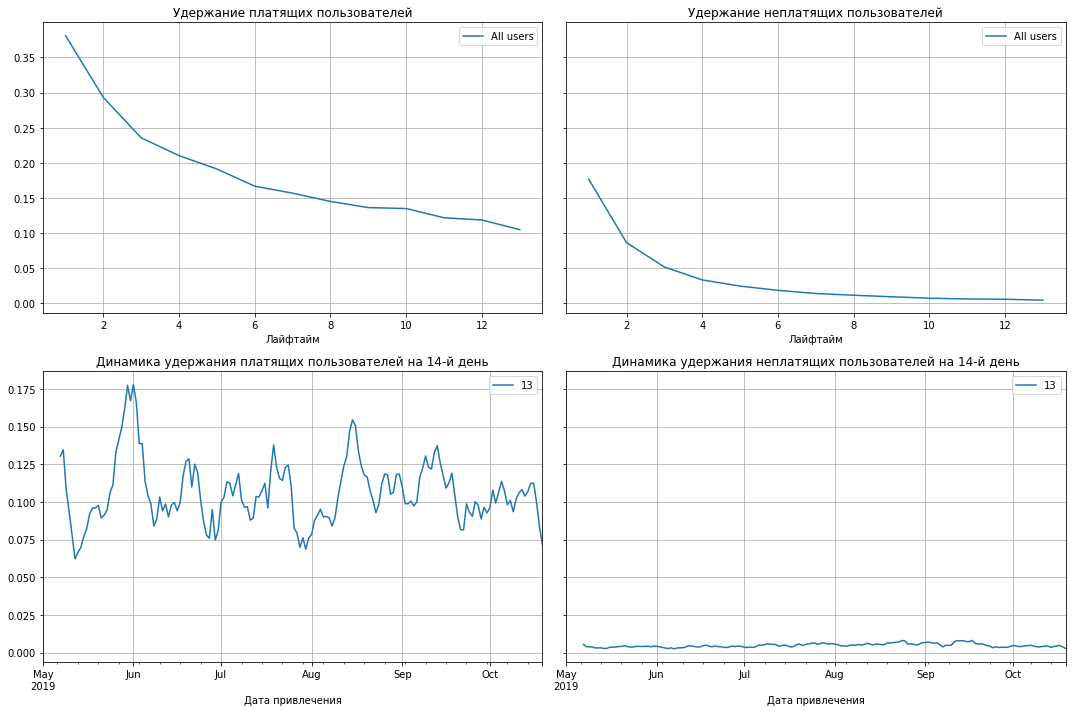

In [41]:
retention_raw, retention_grouped, retention_history = get_retention(payed_profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)

На графиках видно, что удержание платящих пользователей выше как на 1 день, так и спустя 14 дней, чем неплатящих. 


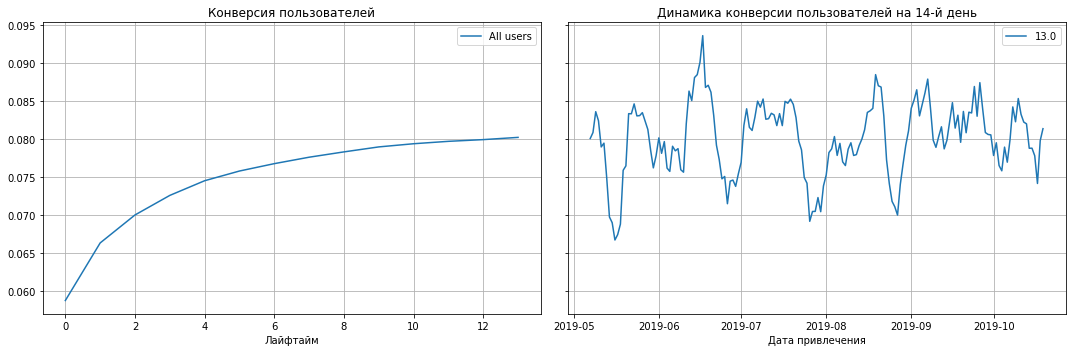

In [42]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(payed_profiles, orders, observation_date, horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия на 14 день колеблется, возможно проводились какие-либо рекламные кампании. Но тем не менее, она остается стабильной.

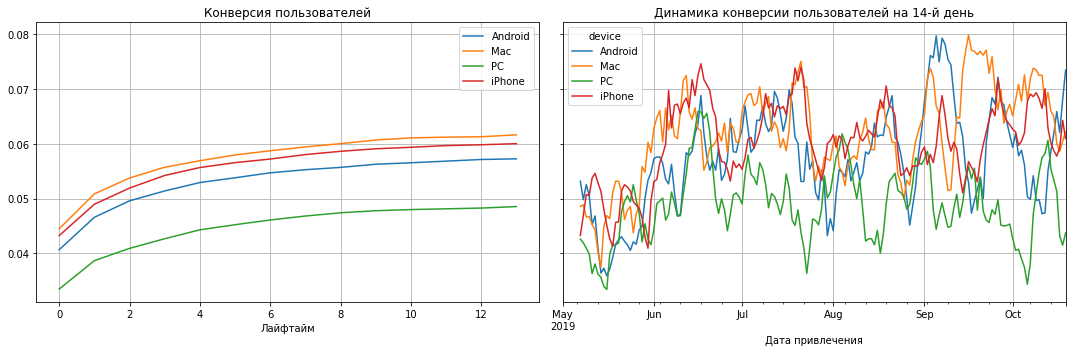

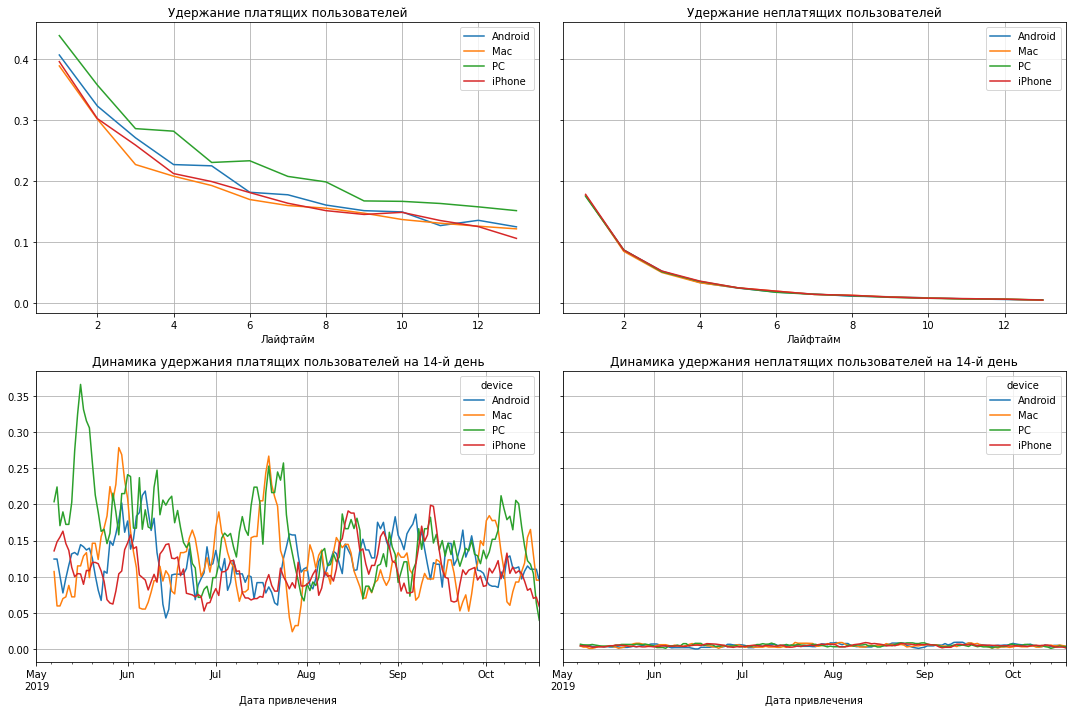

In [43]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
 
plot_conversion(conversion_grouped, conversion_history, horizon_days)
 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
 
plot_retention(retention_grouped, retention_history, horizon_days)

Как мы видим, среди платящих лучше всего удерживаются пользователи ПК, несмотря на то, что конверсия выше у пользователей Макбука. Среди неплатящих удержание в итоге становится одинаково низким по всем устройствам.

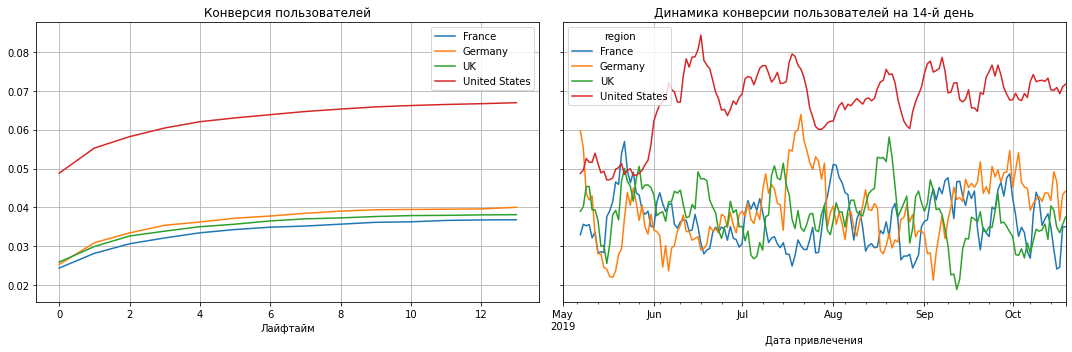

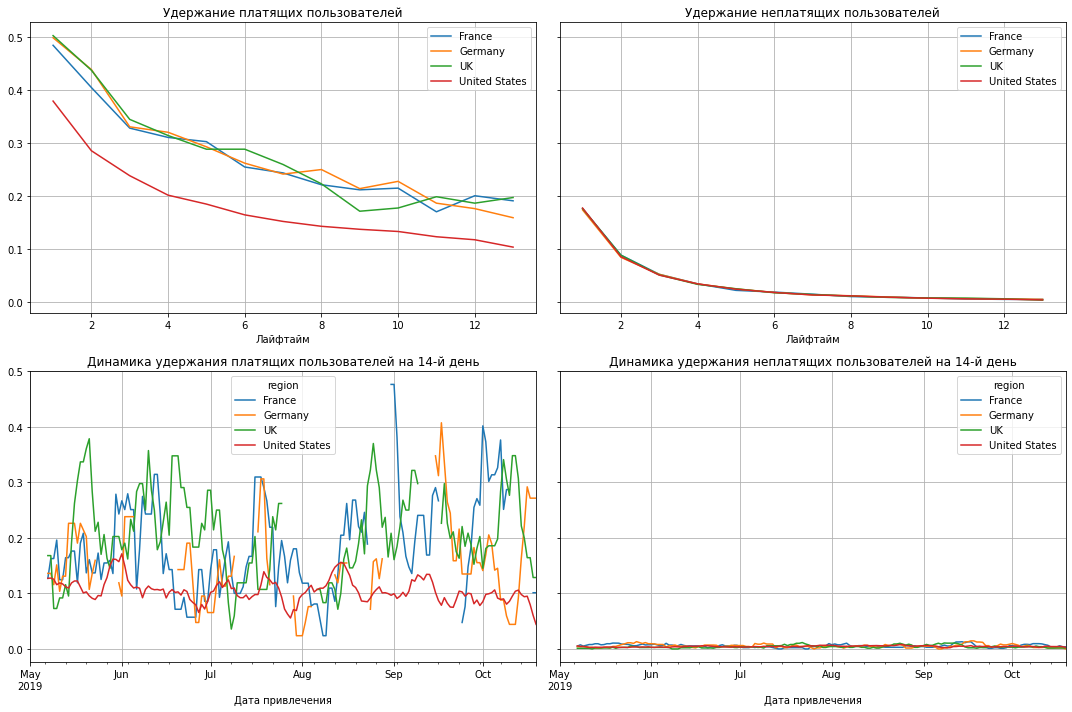

In [44]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
 
plot_conversion(conversion_grouped, conversion_history, horizon_days)
 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
 
plot_retention(retention_grouped, retention_history, horizon_days)

Если смотреть в разрезе по странам, то конверсия выше у пользователей из США, которые держатся в топе даже на 14 день. Но несмотря на это, удерживаются они хуже других и их количество плавно уменьшается со временем. Отсюда можно сделать вывод, что на американскую аудиторию рассчитывать не стоит. А вот пользователи из Великобритании и Германии наоборот, удерживаются хорошо, несмотря на низкую конверсию.

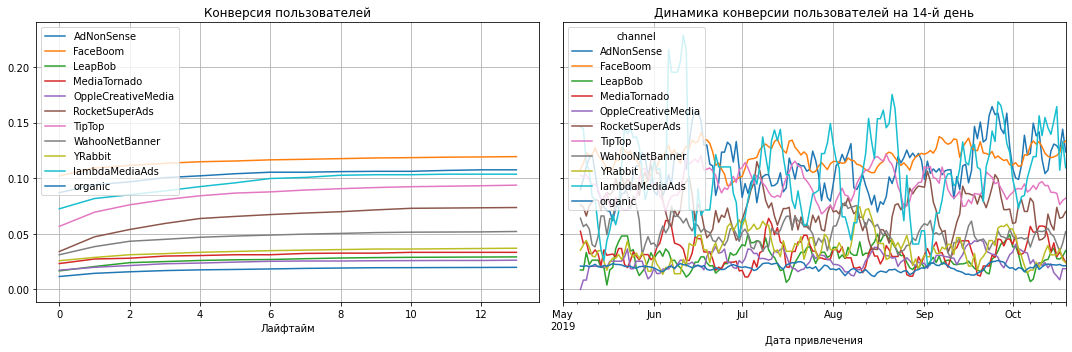

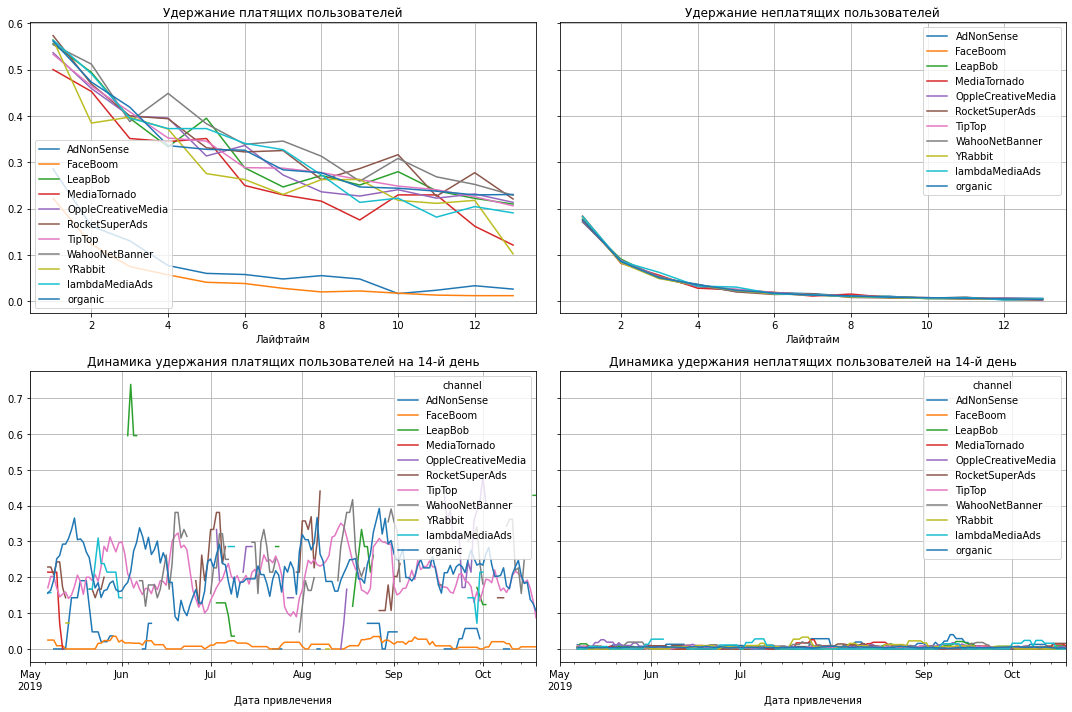

In [45]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
 
plot_conversion(conversion_grouped, conversion_history, horizon_days)
 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
 
plot_retention(retention_grouped, retention_history, horizon_days)

Лидерами по конверсии являются каналы FaceBoom, AdNonSens, LambdaMediaAds, TipTop. У остальных каналов конверсия средняя. Но по удержанию пользователей данные каналы показали себя хуже других, что еще раз показывает то, что средства на них были затрачены зря.

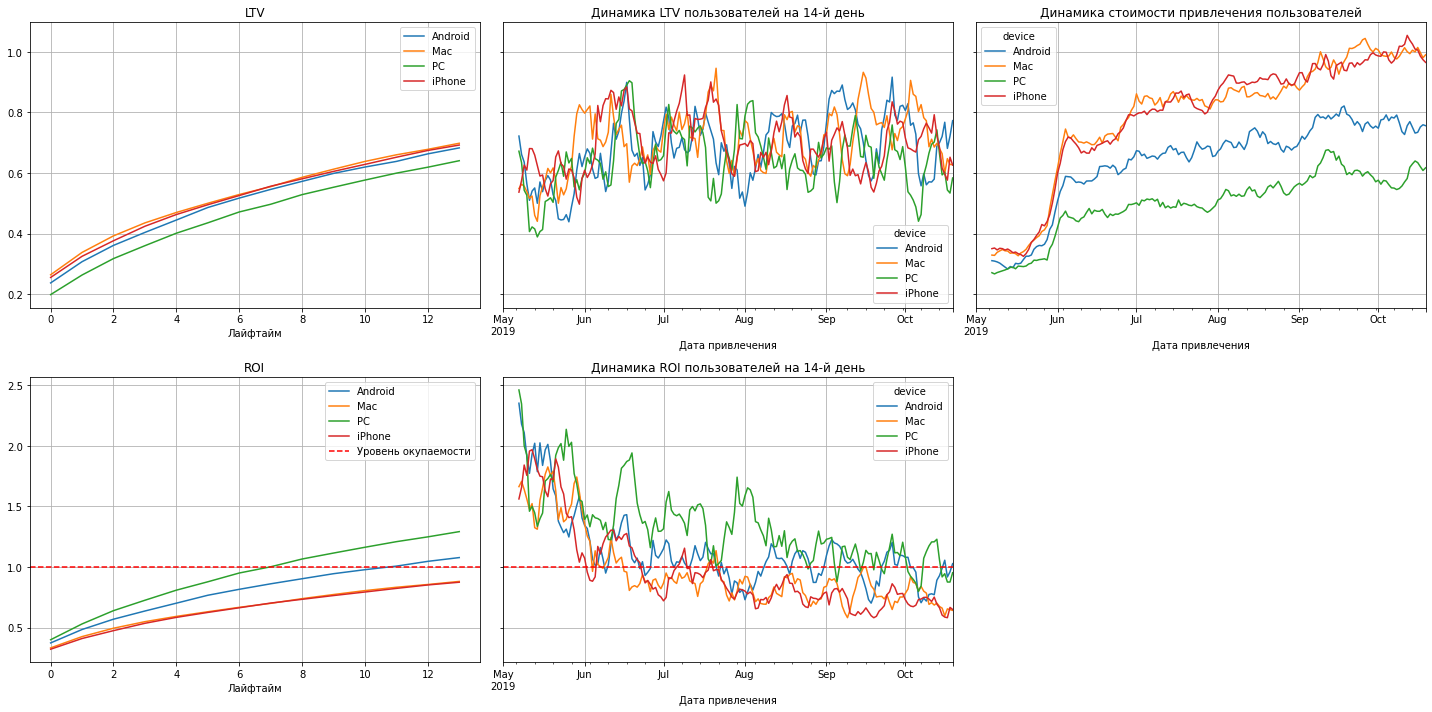

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Несмотря на то, что CAC и LTV у пользователей ПК ниже чем у других устройств, окупаются они гораздо лучше и требуют меньше затрат на рекламные кампании. Самыми дорогими являются Iphone и Mac, которые одинаково плохо окупились к 14 дню. Пользователи смартфонов на системе Android ведут себя стабильно. Затраты на рекламу для Android едва окупаются, и стоимость за одного привлеченного пользователя гораздо ниже чем за пользователей Iphone и Mac. Реклама на ПК начинает окупаться уже на 8 день. 

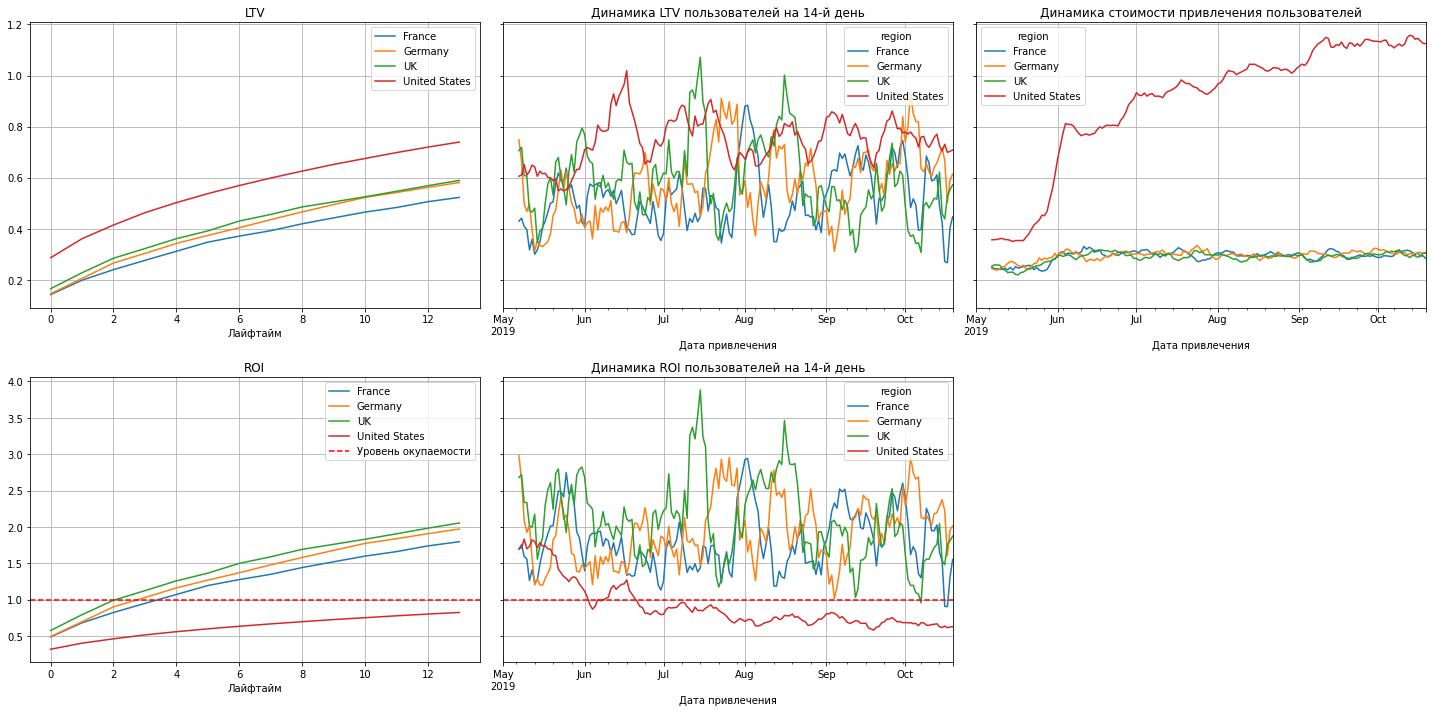

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

LTV пользователей из США гораздо выше, чем из других стран. Однако и стоимость затрат на привлечение там также выше, но при этом, США является лидером по неокупаемосй рекламе, в то время как другие страны веду себя более стабильно. В Великобритании окупаемость скачет, возможно это зависит  от проводимых рекламных кампаний. Наиболее стабильными являются Германия и Франция. Им можно уделить особое внимание.

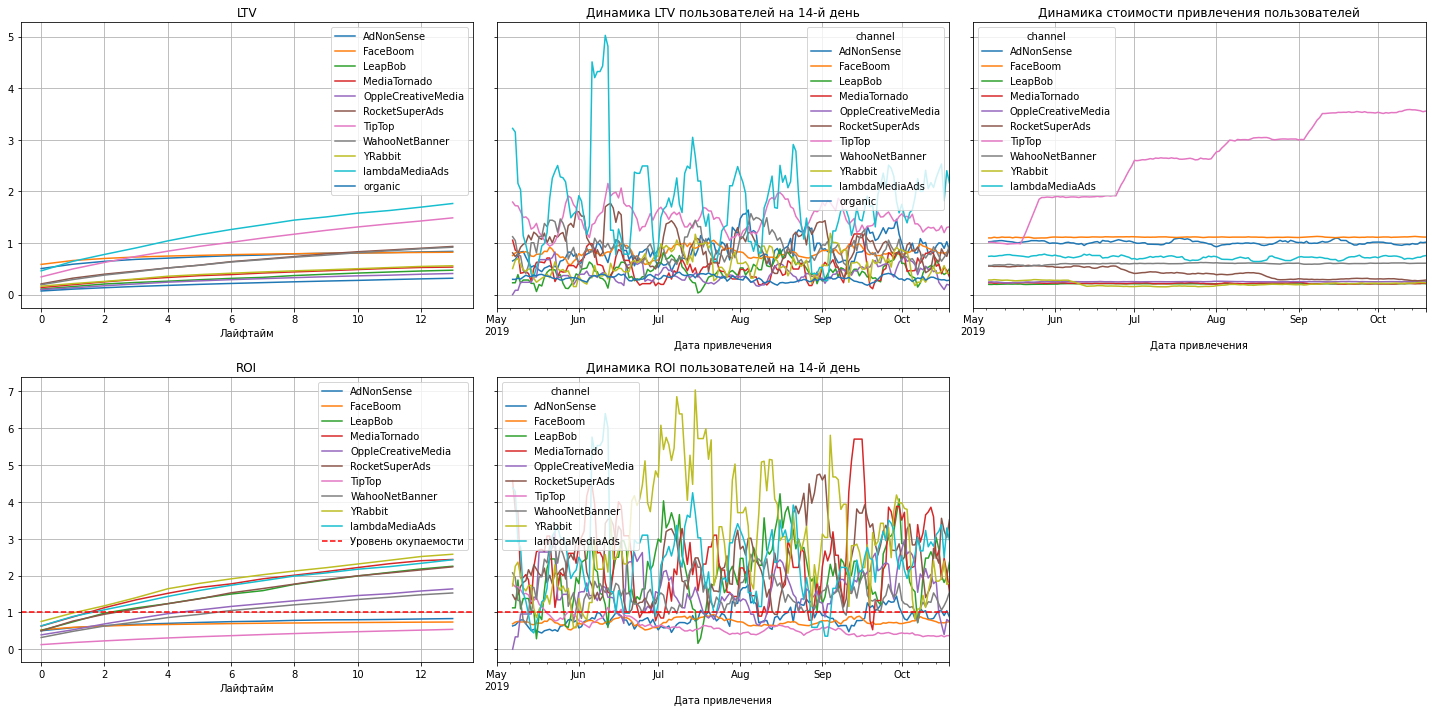

In [48]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

LTV стабилен в каждом рекламном канале. Стоимость привлечения 1 пользователя практически одинакова по всем каналам, кроме TipTop. там она в два раза выше в сравнении с остальными и продолжает расти. Все рекламные кампании, кроме TipTop, FaceBoom и AdNonSens окупились. Получается, закупать рекламу у TipTop для компании не выгодно, так как стоимость за пользователя достаточно высокая, реклама не окупается. Также можем посмотреть динамику окупаемости рекламных каналов по странам, чтобы можно было сделать более конкретные выводы.

In [49]:
ltv_raw = ltv_raw.query('channel != "organic"')
channel_region = ltv_raw.groupby(['region', 'channel'])['acquisition_cost'].sum().reset_index()
channel_region = channel_region.sort_values(by='acquisition_cost', ascending=False)
channel_region.query('region == "Germany" or region == "UK" or region == "France"')

,region,channel,acquisition_cost
3,France,WahooNetBanner,2361.508086
13,UK,WahooNetBanner,2343.594444
8,Germany,WahooNetBanner,2101.382991
0,France,AdNonSense,1382.624748
10,UK,AdNonSense,1327.927606
5,Germany,AdNonSense,1258.185046
14,UK,lambdaMediaAds,904.723178
4,France,lambdaMediaAds,872.950380
12,UK,OppleCreativeMedia,854.649608
2,France,OppleCreativeMedia,812.085957


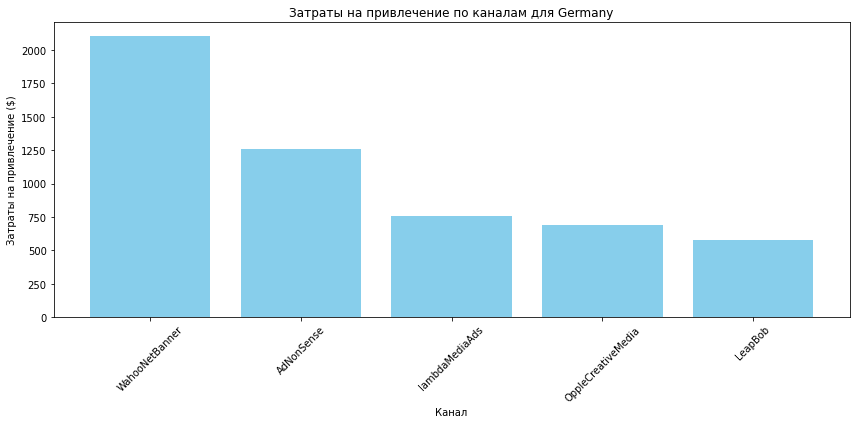

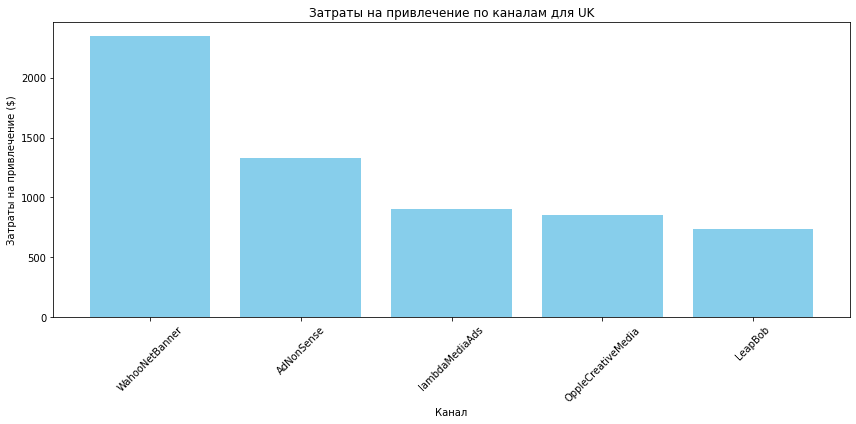

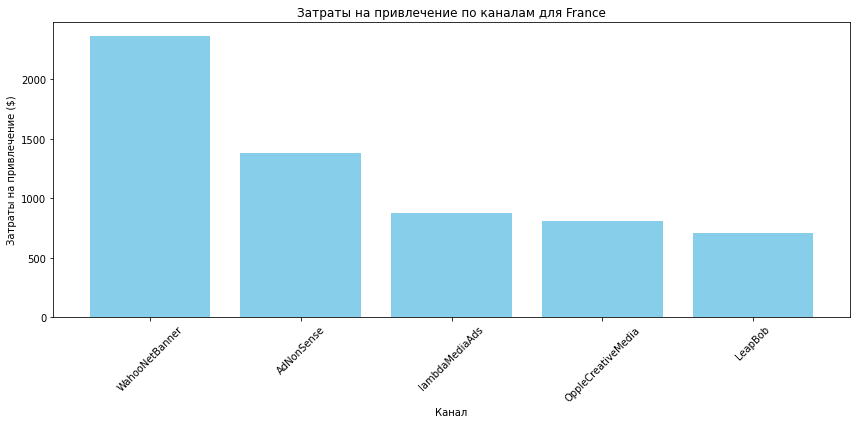

In [50]:
countries = ['Germany', 'UK', 'France']
for country in countries:
    country_data = channel_region.query(f'region == "{country}"')
    plt.figure(figsize=(12, 6))
    plt.bar(country_data['channel'], country_data['acquisition_cost'], color='skyblue')
    plt.xlabel('Канал')
    plt.ylabel('Затраты на привлечение ($)')
    plt.title(f'Затраты на привлечение по каналам для {country}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [51]:
channel_usa = channel_region.query('region == "United States"')
channel_usa = channel_usa.sort_values(by='acquisition_cost', ascending=False)
channel_usa

,region,channel,acquisition_cost
18,United States,TipTop,78717.985217
15,United States,FaceBoom,31918.550822
17,United States,RocketSuperAds,2604.532215
16,United States,MediaTornado,1111.784227
19,United States,YRabbit,1104.271869


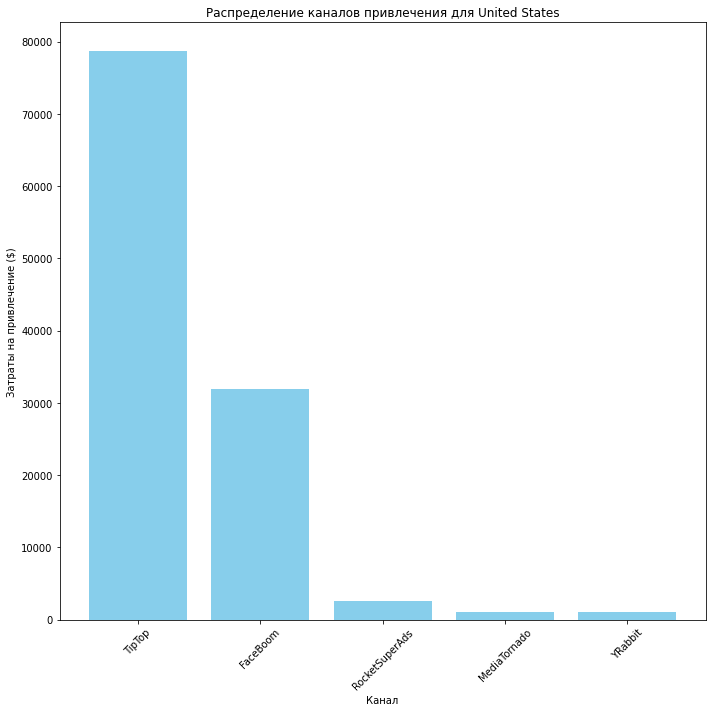

In [52]:
plt.figure(figsize=(10, 10))
plt.bar(channel_usa['channel'], channel_usa['acquisition_cost'], color='skyblue')
plt.xlabel('Канал')
plt.ylabel('Затраты на привлечение ($)')
plt.title('Распределение каналов привлечения для United States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Теперь можно убедиться, что наиболее затратными источниками рекламы остаются TipTop и FaceBoom для США. А также AdNonSens -  и WahooNetBanner в европейских странах. Также данные графики отображают различие рекламных каналов для США и Европы.

In [53]:
devices = ltv_raw.groupby(['region', 'device']).size().reset_index(name='users')
devices = devices.sort_values(by='users', ascending=False)
devices

,region,device,users
15,United States,iPhone,33100
13,United States,Mac,18355
12,United States,Android,15175
14,United States,PC,7759
10,UK,PC,5437
2,France,PC,5275
6,Germany,PC,4548
8,UK,Android,3974
0,France,Android,3836
4,Germany,Android,3359


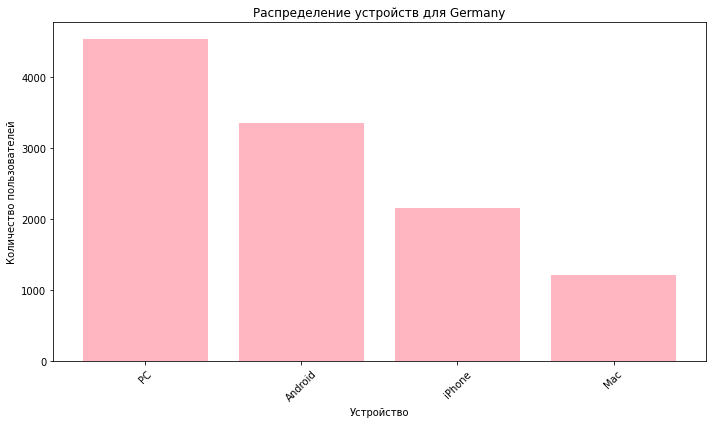

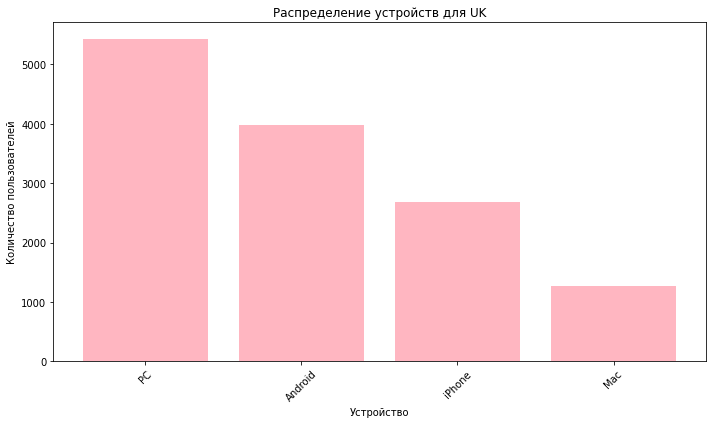

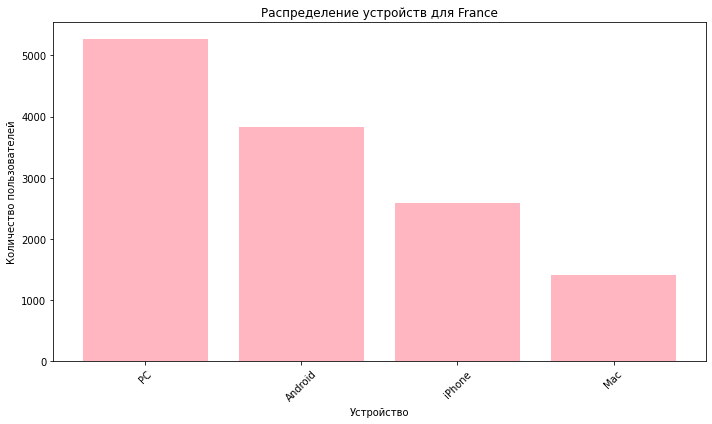

In [54]:
for country in countries:
    devices_data = devices.query(f'region == "{country}"')
    plt.figure(figsize=(10, 6))
    # Используем разные цвета для столбцов
    plt.bar(devices_data['device'], devices_data['users'], color='lightpink')
    plt.xlabel('Устройство')
    plt.ylabel('Количество пользователей')
    plt.title(f'Распределение устройств для {country}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [55]:
devices_usa = devices.query('region == "United States"')
devices_usa = devices_usa.sort_values(by='users', ascending=False)
devices_usa

,region,device,users
15,United States,iPhone,33100
13,United States,Mac,18355
12,United States,Android,15175
14,United States,PC,7759


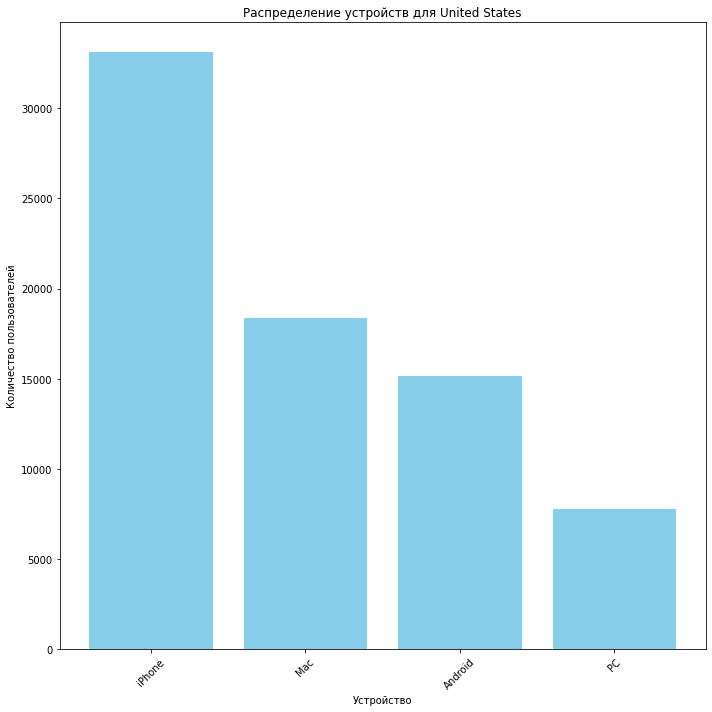

In [56]:
plt.figure(figsize=(10, 10))
plt.bar(devices_usa['device'], devices_usa['users'], color='skyblue')
plt.xlabel('Устройство')
plt.ylabel('Количество пользователей')
plt.title('Распределение устройств для United States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

В целом, реклама окупается, однако, для увеличения количества пользователей продукта, стоит исключить некоторые рекламные каналы и направить внимание на другие. Например, в США наиболее затратным каналом является TipTop и FaceBoom, в Европе AdNonSens и WahooNetBanner. При этом, окупаемость у данных каналов низкая. На рекламу в TipTop была затрачена большая часть бюджета, конверсия в нем средняя, а удержание низкое. В двух других не окупающихся каналах конверсия и удержание низкое. Из полученных результатов можно рекомендовать не использовать данные каналы для рекламы приложения, а уделить больше внимания таким каналам как AdNonSens, LeapBob в Европе и YRabbit, RocketSuperAds в США. Окупаемость данных каналов достаточно высокая, конверсия также хорошая. Также было выявлено, что большая часть европейских пользователей пользуется ПК и Андройдом, а американцы отдают предпочтение Айфону и Макбуку. Поэтому реклама на Макбук и Айфон для европейцев, а на ПК и Андроид для американцев может вызвать проблемы с окупаемостью. 

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Большая часть рекламного бюджета оказалась распределена между источниками TipTop, FaceBoom, WahooNetBanner и AdNonSens. При этом, каналы по привлечению пользователей в Европе и США различаются. Также различаются и используемые устройства: в США - Iphone, Mac, в Европе - PC, Android. В целом, реклама окупается в ольшей части рекламных источников, но ели скорректировать распределение бюджета, это может оказать положительное влияние на развитие приложения. Также выявлено, что большинство пользователей, в том числе платящих, пришли из США. Одной из главных причин неэффективности привлечения пользователей можно выделить использование неверных рекламных каналов. Например, большая часть средств для рекламы в США ушло на рекламу в TipTop, хотя конверсия и удержание в нем значительно ниже чем в каналах с хорошей конверсией и окупаемостью, при этом с низкой стоимостью привлечения одного пользователя. Например, каналы YRabbit и RocketSuperAds. Также, одним из крупнейших каналов является FaceBoom, однако, как удержание, так и окупаемость по нему достаточно низкие, поэтому данный канал следует исключить из списка рекламных источников. 

Также могу порекомендовать нацелить рекламу именно на те устройства,которые больше используются в том или ином регионе. Так, для США это должны быть Iphone, Mac, а в Европе PC и Android. США могу порекомендовать использовать такие каналы как YRabbit, RocketSuperAds, MediaTornado. Так как окупаемость и удержание по ним хорошее, а САС невысокий. Что касается Европы, основными каналами привлечения можно выделить LambdaMediaAds, в котором как окупаемость, так и конверсия достаточно высокие, LeapBob (несмотря на низкую конверсию, удержание пользователей хорошее) и AdNonSens в котором и окупаемость и конверсия хорошие, а стоимость за 1 пользователя вполне доступные. Также могу порекомендовать выделить больше бюджета на Великобританию и Германию, так как оттуда приходят более качественные пользователи. 